# Logistic Regression Model

### Install libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

### Read in the data

In [2]:
pd.set_option('display.max_columns', 50)
LLCP2 = pd.read_csv(r'C:\Users\Nick\Desktop\GitProjects\LLCP_Project\LLCP2.csv')
LLCP2.head()

,SEX,_AGE_G,_BMI5CAT,_EDUCAG,_INCOMG,_DRNKWEK,_RFDRHV5,_PACAT1,PA1MIN_,EXERANY2,_RFHLTH,_VEGESU1,_HCVU651,EMPLOY1,VETERAN3,MARITAL,ADDEPEV2,POORHLTH,PHYSHLTH,MENTHLTH,MENTHLTH2
0,0.0,6.0,1.0,1.0,4.0,5.397605e-79,0.0,1.0,360.0,1.0,1.0,171.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,6.0,1.0,1.0,5.0,5.397605e-79,0.0,1.0,420.0,1.0,1.0,200.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,6.0,1.0,0.0,4.0,1.000000e+02,0.0,4.0,270.0,0.0,1.0,57.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,6.0,1.0,0.0,1.0,5.397605e-79,0.0,2.0,270.0,1.0,0.0,172.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,6.0,0.0,0.0,1.0,5.397605e-79,0.0,4.0,270.0,0.0,0.0,48.0,1.0,0.0,0.0,0.0,0.0,14.0,14.0,0.0,0.0


### Let's run a full logistic regression model first

In [3]:
X1 = LLCP2[['SEX','_AGE_G','_BMI5CAT','_EDUCAG','_INCOMG','_DRNKWEK','_RFDRHV5','_PACAT1','PA1MIN_','EXERANY2',
           '_RFHLTH','_VEGESU1','_HCVU651','EMPLOY1','VETERAN3','MARITAL','ADDEPEV2','POORHLTH',
           'PHYSHLTH']].values

y_logistic1 = LLCP2['MENTHLTH2'].values

In [4]:
logit_model=sm.Logit(y_logistic1,X1)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.509510
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.184      
Dependent Variable: y                AIC:              458613.0359
Date:               2019-08-28 12:16 BIC:              458822.3596
No. Observations:   450016           Log-Likelihood:   -2.2929e+05
Df Model:           18               LL-Null:          -2.8109e+05
Df Residuals:       449997           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
x1       -0.3653     0.0081    -44.9471   0.0000   -0.3813   -0.3494
x2       -0.2857     0.0025   -112.9531   0.0

#### We can see that all variables have p<.05 except for 'x13' (__HCVU651_), so let's drop that from the model first

In [5]:
X2 = LLCP2[['SEX','_AGE_G','_BMI5CAT','_EDUCAG','_INCOMG','_DRNKWEK','_RFDRHV5','_PACAT1','PA1MIN_','EXERANY2',
           '_RFHLTH','_VEGESU1','EMPLOY1','VETERAN3','MARITAL','ADDEPEV2','POORHLTH',
           'PHYSHLTH']].values

y_logistic1 = LLCP2['MENTHLTH2'].values

In [6]:
logit_model=sm.Logit(y_logistic1,X2)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.509512
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.184      
Dependent Variable: y                AIC:              458612.6880
Date:               2019-08-28 12:17 BIC:              458810.9947
No. Observations:   450016           Log-Likelihood:   -2.2929e+05
Df Model:           17               LL-Null:          -2.8109e+05
Df Residuals:       449998           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
x1       -0.3656     0.0081    -44.9955   0.0000   -0.3815   -0.3497
x2       -0.2847     0.0024   -117.7973   0.0

### Model fitting

In [7]:
X = LLCP2[['SEX','_AGE_G','_BMI5CAT','_EDUCAG','_INCOMG','_DRNKWEK','_RFDRHV5','_PACAT1','PA1MIN_','EXERANY2',
           '_RFHLTH','_VEGESU1','EMPLOY1','VETERAN3','MARITAL','ADDEPEV2','POORHLTH',
           'PHYSHLTH']].values

y_logistic = LLCP2['MENTHLTH2'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y_logistic, test_size=0.3, random_state=0)
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

### Predicting the test set results and calculating the accuracy

In [9]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.76


### Confusion Matrix

In [10]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[84377  7913]
 [24232 18483]]


#### The result is telling us that we have 84377+7913 correct predictions and 24232+18483 incorrect predictions.

In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.91      0.84     92290
         1.0       0.70      0.43      0.53     42715

   micro avg       0.76      0.76      0.76    135005
   macro avg       0.74      0.67      0.69    135005
weighted avg       0.75      0.76      0.74    135005



### Receiver Operating Characteristic (ROC) Curve

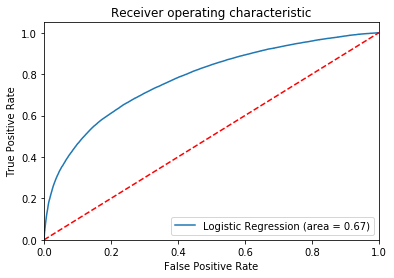

In [12]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### The receiver operating characteristic (ROC) curve is tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).